# Churn                                                                                                        
### Exploratory Data Analysis in Python

### _By: Ankur Patel_
---


### Introduction:

The churn dataset was used to predict the churn rate of the customers. It's the percentage of subscribers to a service who discontinue their subscriptions to the service within a given time period. This report will include analysis of this dataset of 21 variables, including the missing values, outliers, distribution of variables, and graphs. The outputs will include comments or descriptions, and the conclusion will have the overall observation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")  #exclude warning messages
pd.set_option('display.max_columns', 100)  #show all columns

In [2]:
df = pd.read_csv("churn.txt")
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


Although there are no null values in this dataset, if there were any, the following would've been done to substitute for them.

__df.fillna(df.mean())__  
- fill with mean of the columns

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area Code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
VMail Message,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Day Mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Day Calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Day Charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Eve Mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Eve Calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Eve Charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Night Mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [5]:
print(df.groupby('Churn?')["Phone"].count())
print("\nChurn Rate:",(483/2850)*100,"%")

Churn?
False.    2850
True.      483
Name: Phone, dtype: int64

Churn Rate: 16.94736842105263 %


In [29]:
churn1 = df.groupby("Churn?")
churn1.mean()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Churn?,,,,,,,,,,,,,,,,
False.,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True.,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


In [7]:
print(df.groupby("Int'l Plan")["Phone"].count())
print("\nInternational Plans:",(323/3010)*100,"%")

Int'l Plan
no     3010
yes     323
Name: Phone, dtype: int64

International Plans: 10.730897009966778 %


- There are 3333 records (2850 False Churn, 483 True Churn)
- No missing values
- 16.95% of phones churned
- ~10% have international plans

### Univariate Distribution:

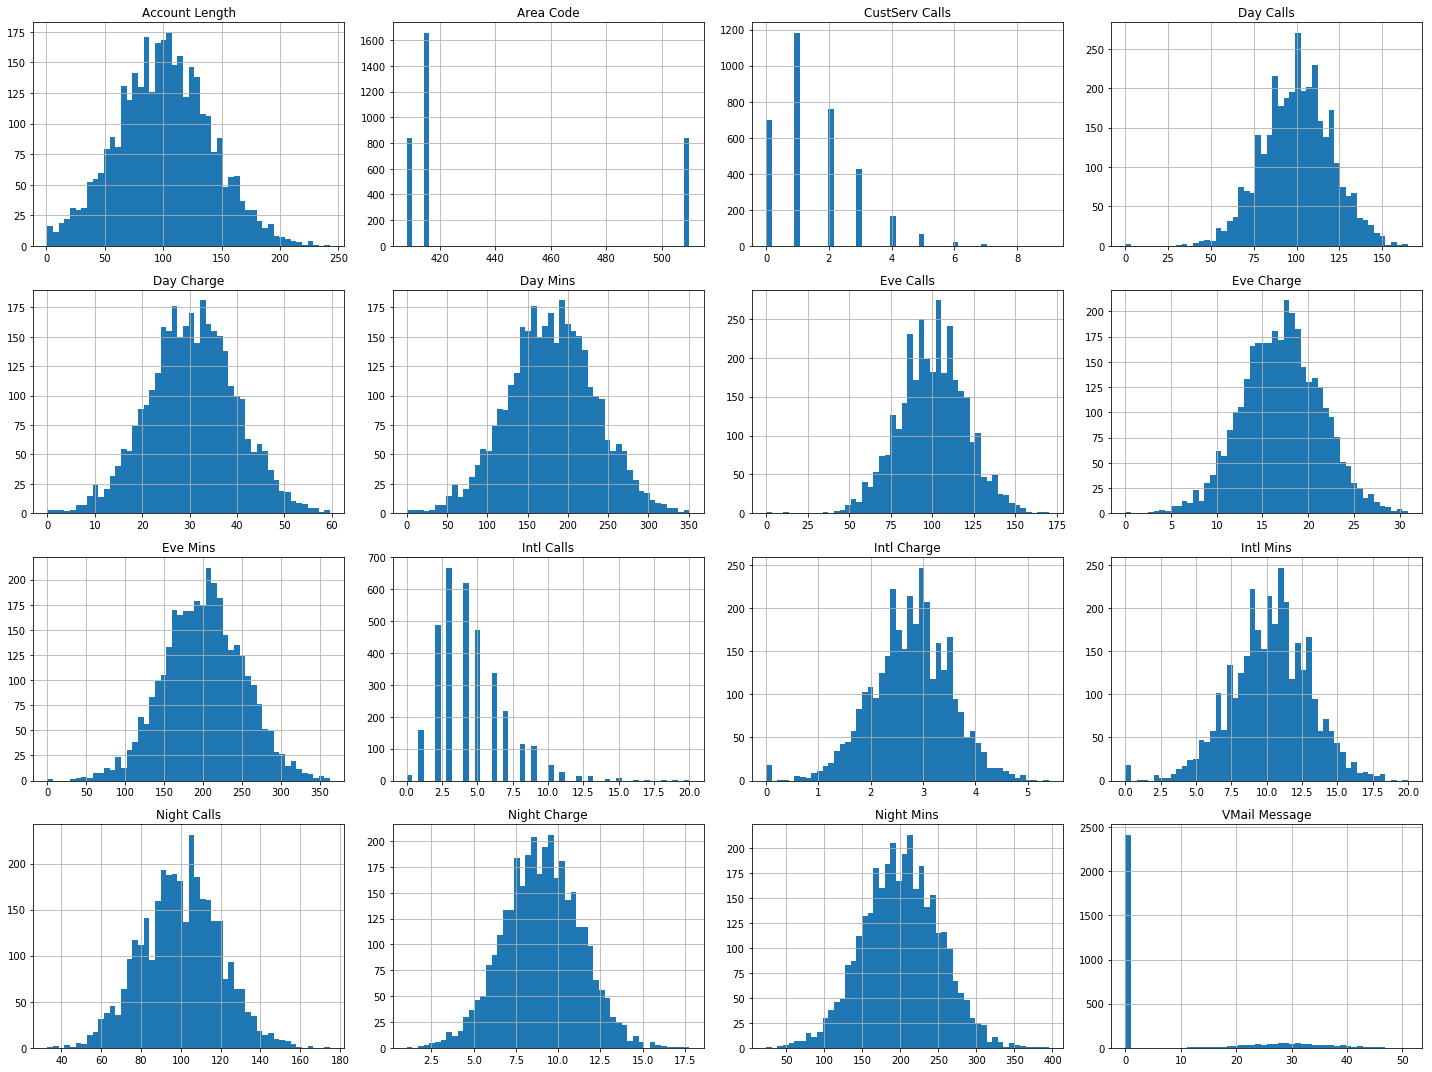

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()    
plt.show()

- Calls, Mins, Charge are normally distributed
- CustServ Calls histogram shows about 80% of the phones have made customer service calls
- About 2400 of the phones have no voicemails, and some phones have about 10 to 55 voicemails
- There were majorly 2 to 5 international calls for the phones

### Interaction & Correlation:

- Correlation between two attributes

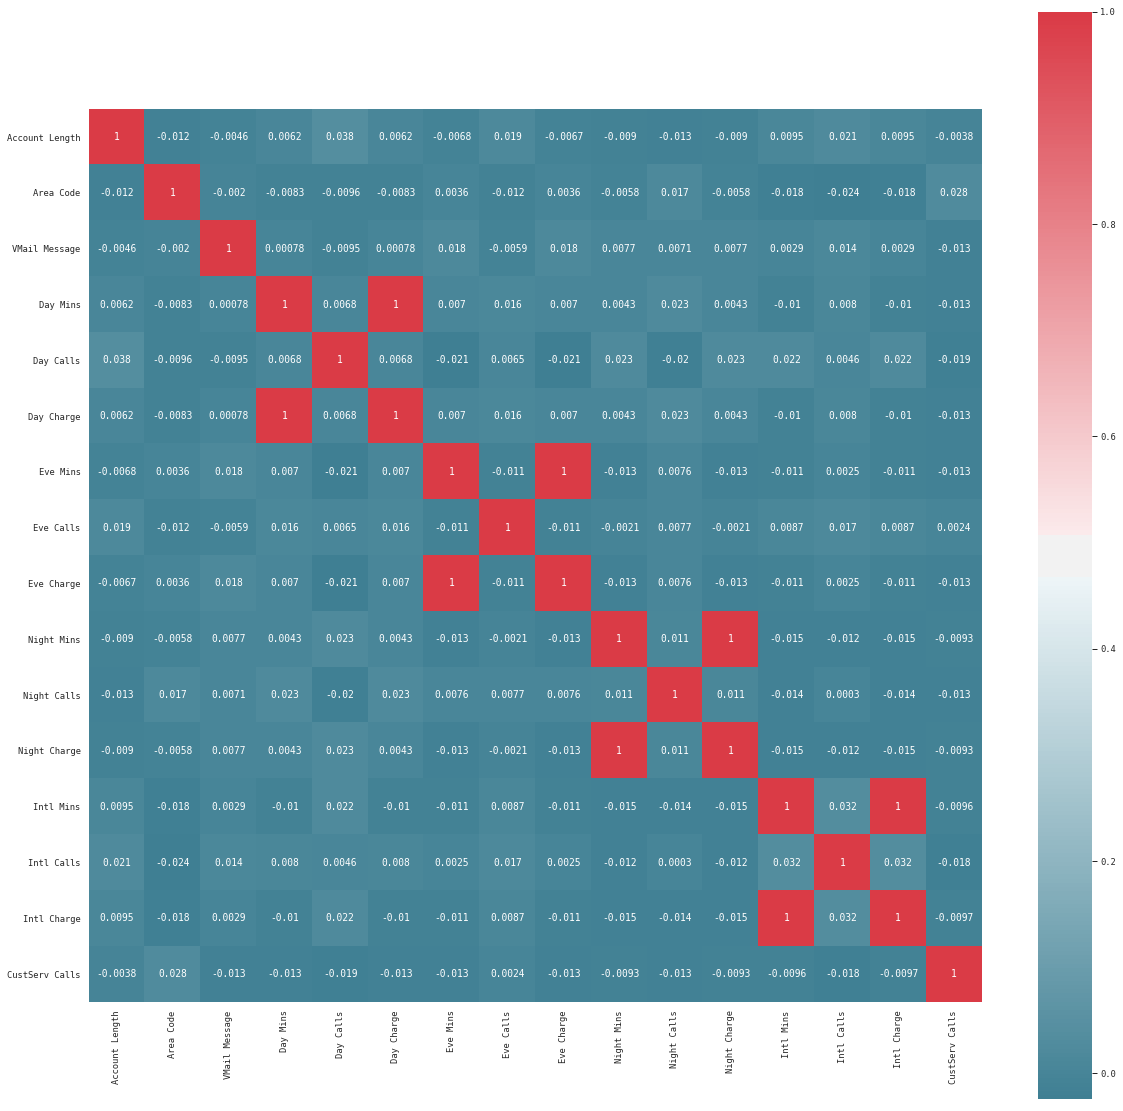

In [9]:
sns.set(context="paper",font="monospace")
housing_corr_matrix = df.corr()
fig, axe = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True) #color palettes
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True ) #draw heatmap

From this correlation graph, it's clear that minutes are directly correlated with charge because of the 100% correlation. It's a _**pay by the minute**_ service.

### Feature Importance:

In [10]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [11]:
df1 = df[["Account Length","Day Mins","Day Calls","Day Charge","Eve Mins","Eve Calls","Eve Charge",
          "Night Mins","Night Calls","Night Charge","Intl Mins","Intl Calls","Intl Charge","CustServ Calls"]]

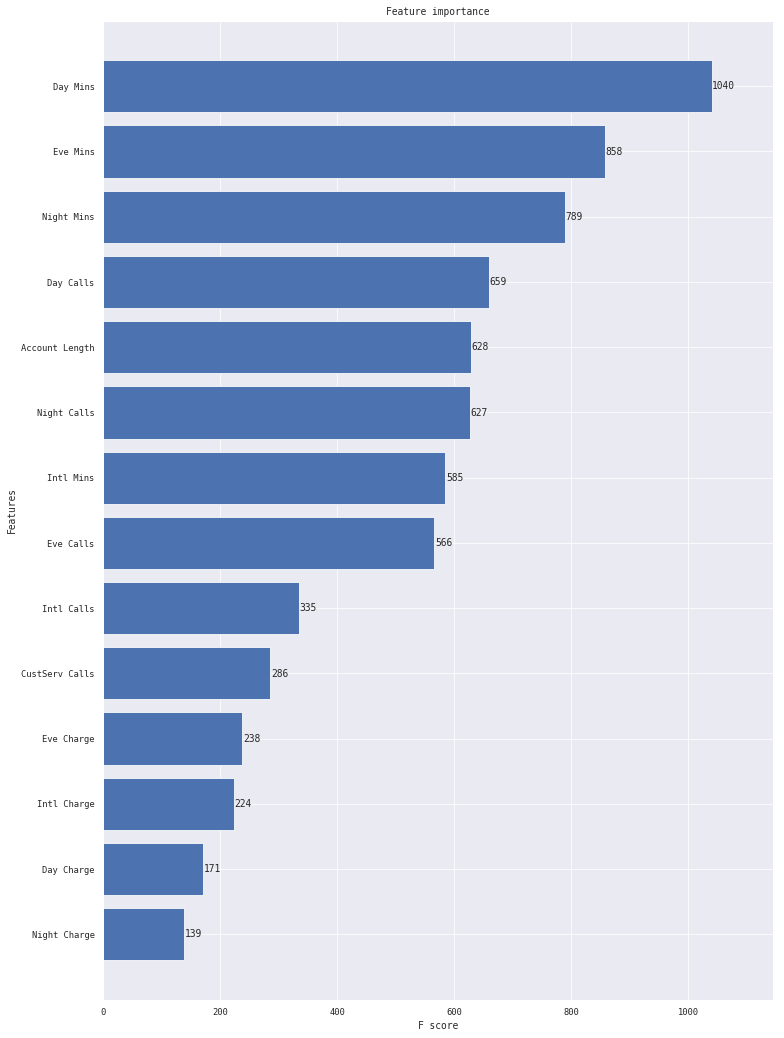

In [12]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(df1, df[["Churn?"]])
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()

Feature importance also indicates that it's a _**pay by the minute**_ service because they're also the most significant features.

### IQR:
Detecting outliers by using the lower and upper boundries calculated by the interquartile range, which is quartile 3 minus quartile 2, and multiplied by 1.5.

In [13]:
q1_acc, q3_acc = np.percentile(df["Account Length"],[25,75])  #find 1st and 3rd quartile    
iqr_acc = q3_acc - q1_acc  #interquartile range
lower_acc = q1_acc - (1.5 * iqr_acc)  #lower bound
upper_acc = q3_acc + (1.5 * iqr_acc)  #upper bound
outliers_acc = df["Account Length"][(df["Account Length"] < lower_acc) | (df["Account Length"] > upper_acc)]  
#if outside the lower & upper boundaries
outliers_acc

197     208
238     215
309     209
416     224
817     243
1045    217
1093    210
1387    212
1408    232
1551    225
1751    225
1886    224
2150    212
2259    210
2277    217
2700    209
3216    221
3227    209
Name: Account Length, dtype: int64

In [14]:
q1_cc, q3_cc = np.percentile(df["CustServ Calls"],[25,75])    
iqr_cc = q3_cc - q1_cc  
lower_cc = q1_cc - (1.5 * iqr_cc)  
upper_cc = q3_cc + (1.5 * iqr_cc)  
outliers_cc = df["CustServ Calls"][(df["CustServ Calls"] < lower_cc) | (df["CustServ Calls"] > upper_cc)]
outliers_cc

10      4
14      4
15      4
21      5
48      5
54      5
69      4
77      4
86      4
97      4
100     4
105     4
112     4
126     4
127     4
133     4
136     5
154     5
180     4
181     5
198     4
228     4
235     5
248     4
250     4
251     4
255     4
266     4
293     5
298     4
       ..
3026    6
3027    4
3035    4
3050    4
3064    4
3079    5
3081    6
3112    7
3115    4
3125    4
3127    4
3131    5
3140    5
3144    5
3147    4
3157    4
3169    4
3181    5
3190    6
3228    5
3243    5
3247    4
3280    4
3287    4
3304    4
3307    4
3309    4
3320    4
3322    4
3323    5
Name: CustServ Calls, Length: 267, dtype: int64

In [15]:
q1_dc, q3_dc = np.percentile(df["Day Calls"],[25,75])    
iqr_dc = q3_dc - q1_dc  
lower_dc = q1_dc - (1.5 * iqr_dc)  
upper_dc = q3_dc + (1.5 * iqr_dc)  
outliers_dc = df["Day Calls"][(df["Day Calls"] < lower_dc) | (df["Day Calls"] > upper_dc)]
outliers_dc

315     158
468     163
692      36
740      40
1057    158
1121    165
1144     30
1322     42
1345      0
1346     45
1397      0
1422     45
1460    160
1869    156
1989     35
2217     42
2392    158
2394    157
2492     45
2884     44
2885     44
2964     44
3187     40
Name: Day Calls, dtype: int64

In [16]:
q1_dch, q3_dch = np.percentile(df["Day Charge"],[25,75])    
iqr_dch = q3_dch - q1_dch  
lower_dch = q1_dch - (1.5 * iqr_dch)  
upper_dch = q3_dch + (1.5 * iqr_dch)  
outliers_dch = df["Day Charge"][(df["Day Charge"] < lower_dch) | (df["Day Charge"] > upper_dch)]
outliers_dch

15      56.59
156     57.36
197     55.51
365     59.64
605     57.04
685      5.25
741      5.78
975     56.83
985     58.96
1052     2.13
1076     4.40
1345     0.00
1397     0.00
1621     3.32
1679    56.07
1986     1.34
2028    55.78
2124     4.59
2252     2.99
2412    55.47
2594    58.70
2736     0.44
2753     1.33
3046     3.21
3174     5.08
Name: Day Charge, dtype: float64

In [17]:
q1_dm, q3_dm = np.percentile(df["Day Mins"],[25,75])    
iqr_dm = q3_dm - q1_dm  
lower_dm = q1_dm - (1.5 * iqr_dm)  
upper_dm = q3_dm + (1.5 * iqr_dm)  
outliers_dm = df["Day Mins"][(df["Day Mins"] < lower_dm) | (df["Day Mins"] > upper_dm)]
outliers_dm

15      332.9
156     337.4
197     326.5
365     350.8
605     335.5
685      30.9
741      34.0
975     334.3
985     346.8
1052     12.5
1076     25.9
1345      0.0
1397      0.0
1621     19.5
1679    329.8
1986      7.9
2028    328.1
2124     27.0
2252     17.6
2412    326.3
2594    345.3
2736      2.6
2753      7.8
3046     18.9
3174     29.9
Name: Day Mins, dtype: float64

In [18]:
q1_ec, q3_ec = np.percentile(df["Eve Calls"],[25,75])    
iqr_ec = q3_ec - q1_ec  
lower_ec = q1_ec - (1.5 * iqr_ec)  
upper_ec = q3_ec + (1.5 * iqr_ec)  
outliers_ec = df["Eve Calls"][(df["Eve Calls"] < lower_ec) | (df["Eve Calls"] > upper_ec)]
outliers_ec

58      164
154      46
301     168
475      42
646      37
960      12
1020    157
1071    155
1266     45
1615     36
1706    156
1730     46
1856     44
2227    155
2592     46
2853     43
2932      0
3121    155
3157    159
3219    170
Name: Eve Calls, dtype: int64

In [19]:
q1_ech, q3_ech = np.percentile(df["Eve Charge"],[25,75])    
iqr_ech = q3_ech - q1_ech  
lower_ech = q1_ech - (1.5 * iqr_ech)  
upper_ech = q3_ech + (1.5 * iqr_ech)  
outliers_ech = df["Eve Charge"][(df["Eve Charge"] < lower_ech) | (df["Eve Charge"] > upper_ech)]
outliers_ech

3        5.26
6       29.62
8       29.89
32       2.65
302     29.79
533      3.59
580     29.52
587      5.01
821      3.73
850      4.50
889      3.61
893      5.17
1054     4.98
1190     4.76
1233     4.09
1335     5.10
1601    29.83
1960     4.18
2160    28.89
2331    30.75
2551    30.11
2732    30.91
2932     0.00
3075    29.01
Name: Eve Charge, dtype: float64

In [20]:
q1_em, q3_em = np.percentile(df["Eve Mins"],[25,75])    
iqr_em = q3_em - q1_em  
lower_em = q1_em - (1.5 * iqr_em)  
upper_em = q3_em + (1.5 * iqr_em)  
outliers_em = df["Eve Mins"][(df["Eve Mins"] < lower_em) | (df["Eve Mins"] > upper_em)]
outliers_em

3        61.9
6       348.5
8       351.6
32       31.2
302     350.5
533      42.2
580     347.3
587      58.9
821      43.9
850      52.9
889      42.5
893      60.8
1054     58.6
1190     56.0
1233     48.1
1335     60.0
1601    350.9
1960     49.2
2160    339.9
2331    361.8
2551    354.2
2732    363.7
2932      0.0
3075    341.3
Name: Eve Mins, dtype: float64

In [21]:
q1_nc, q3_nc = np.percentile(df["Night Calls"],[25,75])    
iqr_nc = q3_nc - q1_nc  
lower_nc = q1_nc - (1.5 * iqr_nc)  
upper_nc = q3_nc + (1.5 * iqr_nc)  
outliers_nc = df["Night Calls"][(df["Night Calls"] < lower_nc) | (df["Night Calls"] > upper_nc)]
outliers_nc

315      46
326      42
335      44
395      42
429     153
493     175
586     154
901     158
1109    155
1200    157
1296    157
1748    154
1810    153
2288    166
2659     33
2728    155
2736    156
2903     38
2988     36
3172    156
3211    164
3234    153
Name: Night Calls, dtype: int64

In [22]:
q1_nch, q3_nch = np.percentile(df["Night Charge"],[25,75])    
iqr_nch = q3_nch - q1_nch  
lower_nch = q1_nch - (1.5 * iqr_nch)  
upper_nch = q3_nch + (1.5 * iqr_nch)  
outliers_nch = df["Night Charge"][(df["Night Charge"] < lower_nch) | (df["Night Charge"] > upper_nch)]
outliers_nch

116      2.59
244     15.97
444     15.71
862     15.56
883      2.03
918     15.43
922     16.39
992      2.85
999      2.45
1072     2.25
1113     1.97
1202    15.74
1238    15.86
1260     1.04
1313     2.86
1317    17.19
1445    16.99
2321    16.55
2350     2.55
2382     2.43
2452     2.89
2609    15.49
2663    17.77
2754    15.76
2756     2.25
3024     2.40
3060    15.85
3107    16.42
3159     2.76
3247     2.13
Name: Night Charge, dtype: float64

In [23]:
q1_nm, q3_nm = np.percentile(df["Night Mins"],[25,75])    
iqr_nm = q3_nm - q1_nm  
lower_nm = q1_nm - (1.5 * iqr_nm)  
upper_nm = q3_nm + (1.5 * iqr_nm)  
outliers_nm = df["Night Mins"][(df["Night Mins"] < lower_nm) | (df["Night Mins"] > upper_nm)]
outliers_nm

116      57.5
244     354.9
444     349.2
862     345.8
883      45.0
918     342.8
922     364.3
992      63.3
999      54.5
1072     50.1
1113     43.7
1202    349.7
1238    352.5
1260     23.2
1313     63.6
1317    381.9
1445    377.5
2321    367.7
2350     56.6
2382     54.0
2452     64.2
2609    344.3
2663    395.0
2754    350.2
2756     50.1
3024     53.3
3060    352.2
3107    364.9
3159     61.4
3247     47.4
Name: Night Mins, dtype: float64

In [24]:
q1_ic, q3_ic = np.percentile(df["Intl Calls"],[25,75])    
iqr_ic = q3_ic - q1_ic  
lower_ic = q1_ic - (1.5 * iqr_ic)  
upper_ic = q3_ic + (1.5 * iqr_ic)  
outliers_ic = df["Intl Calls"][(df["Intl Calls"] < lower_ic) | (df["Intl Calls"] > upper_ic)]
outliers_ic

22      19
41      15
153     11
182     12
185     13
211     11
219     12
250     11
272     13
329     12
341     11
347     11
377     18
420     11
474     12
483     13
504     12
514     12
588     11
636     15
642     13
674     15
698     11
723     11
756     14
837     13
842     11
854     13
863     13
883     12
        ..
1832    11
1889    15
1960    11
2001    14
2018    11
2156    11
2212    12
2269    13
2562    11
2576    11
2621    16
2703    13
2724    11
2775    13
2826    11
2835    15
2883    11
2930    12
2947    13
2956    18
2970    12
3025    12
3071    12
3097    11
3109    13
3128    11
3206    13
3230    14
3291    20
3310    17
Name: Intl Calls, Length: 78, dtype: int64

In [25]:
q1_ich, q3_ich = np.percentile(df["Intl Charge"],[25,75])    
iqr_ich = q3_ich - q1_ich  
lower_ich = q1_ich - (1.5 * iqr_ich)  
upper_ich = q3_ich + (1.5 * iqr_ich)  
outliers_ich = df["Intl Charge"][(df["Intl Charge"] < lower_ich) | (df["Intl Charge"] > upper_ich)]
outliers_ich

115     5.40
179     0.00
214     4.75
225     0.73
314     5.10
343     0.00
367     4.86
397     0.54
488     0.00
502     4.73
515     4.73
535     4.91
595     0.00
712     0.00
762     0.35
878     0.00
1028    0.00
1080    0.00
1099    0.59
1257    4.86
1400    0.00
1420    4.83
1564    0.00
1816    4.97
1966    0.54
2004    4.81
2180    0.78
2197    0.84
2229    4.75
2256    0.70
2345    0.00
2362    0.00
2371    4.91
2513    0.00
2534    4.86
2669    0.30
2733    0.00
2816    4.94
2906    0.00
2918    0.00
2933    0.57
3022    0.78
3080    4.73
3160    0.57
3216    0.65
3234    0.68
3275    0.00
3290    0.00
3307    4.81
Name: Intl Charge, dtype: float64

In [26]:
q1_im, q3_im = np.percentile(df["Intl Mins"],[25,75])    
iqr_im = q3_im - q1_im  
lower_im = q1_im - (1.5 * iqr_im)  
upper_im = q3_im + (1.5 * iqr_im)  
outliers_im = df["Intl Mins"][(df["Intl Mins"] < lower_im) | (df["Intl Mins"] > upper_im)]
outliers_im

115     20.0
179      0.0
214     17.6
225      2.7
314     18.9
343      0.0
367     18.0
397      2.0
488      0.0
535     18.2
595      0.0
712      0.0
762      1.3
878      0.0
1028     0.0
1080     0.0
1099     2.2
1257    18.0
1400     0.0
1420    17.9
1564     0.0
1816    18.4
1966     2.0
2004    17.8
2180     2.9
2197     3.1
2229    17.6
2256     2.6
2345     0.0
2362     0.0
2371    18.2
2513     0.0
2534    18.0
2669     1.1
2733     0.0
2816    18.3
2906     0.0
2918     0.0
2933     2.1
3022     2.9
3160     2.1
3216     2.4
3234     2.5
3275     0.0
3290     0.0
3307    17.8
Name: Intl Mins, dtype: float64

In [27]:
q1_vm, q3_vm = np.percentile(df["VMail Message"],[25,75])    
iqr_vm = q3_vm - q1_vm  
lower_vm = q1_vm - (1.5 * iqr_vm)  
upper_vm = q3_vm + (1.5 * iqr_vm)  
outliers_vm = df["VMail Message"][(df["VMail Message"] < lower_vm) | (df["VMail Message"] > upper_vm)]
outliers_vm

845    51
Name: VMail Message, dtype: int64

### Conclusion:

After analyzing this dataset, the following things were found: the records according to minutes, calls, and charge are normally distributed; 16.95% of the phones were churned; about 10% have international plans and they generally had 2 to 5 international calls; and about 80% have made customer service calls. The dataset didn't have any missing values and the continuous variables were normally distributed, hence it was a normal dataset. The histograms showing the distribution of the data gives good insights about the outliers also. The outliers were calculated using lower and upper boundaries found by the IQR times 1.5 for the continuous variables. The area code variable is disregarded because that's biased according to the phones in this dataset. As for the voicemail messages, there are mostly 0 messages but the histogram shows a range of outliers from 10 to 50. The overall observation seen was that this is a pay by the minute service since minutes and charge had 100% correlation and that minutes were the most significant factors.